In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

| Features | Description |
|-----------|-----------|
| Invoice id: | Computer generated sales slip invoice identification number
| Branch:| Branch of supercenter (3 branches are available identified by A, B and C).
|City: | Type of customers, recorded by Members for customers using member card and Normal for without member card.
|Customer type: | landing page yang diakses oleh pelanggan (laman lama atau laman baru)
|Gender: | Gender type of customer
|Product line: | General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
|Unit price: | Price of each product in dollar
|Quantity: | Number of products purchased by customer
|Tax: |5% tax fee for customer buying
|Total: | Total price including tax
|Date: | Date of purchase (Record available from January 2019 to March 2019)
|Time: |Purchase time (10am to 9pm)
|Payment: |Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
|COGS: | Cost of goods sold
|Gross margin percentage: | Gross margin percentage
|Gross income:| Gross income
|Rating: | Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Aku adalah CEO supermarket ini, apa yang ingin aku lihat?

- Nilai dan transaksi per kategori
- Nilai dan transaksi per kategori per kota
- Insight apa yang bisa diambil?
- Harga terlalu murah atau cogs terlalu tinggi -> Bar chart numpuk setiap bulan(?), show all month, show individual month.
- Trx/bulan untuk setiap kategorinya

In [4]:
df['gross margin percentage'].unique()

array([4.76190476])

- melihat di 3 kota manakah transaksi dan untung mana yang paling tinggi

<Figure size 864x576 with 0 Axes>

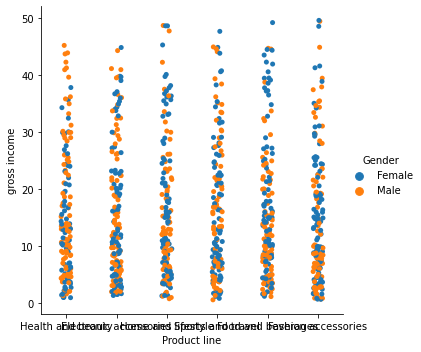

In [5]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Berat yang di kelompokkan terhadap Product Importance dan Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='Product line', y='gross income',hue='Gender',data=df)

<Figure size 864x576 with 0 Axes>

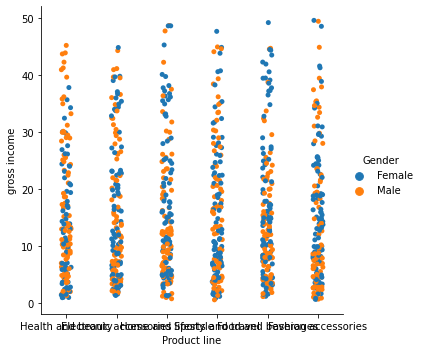

In [6]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Berat yang di kelompokkan terhadap Product Importance dan Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='Product line', y='gross income',hue='Gender',data=df)

<AxesSubplot:>

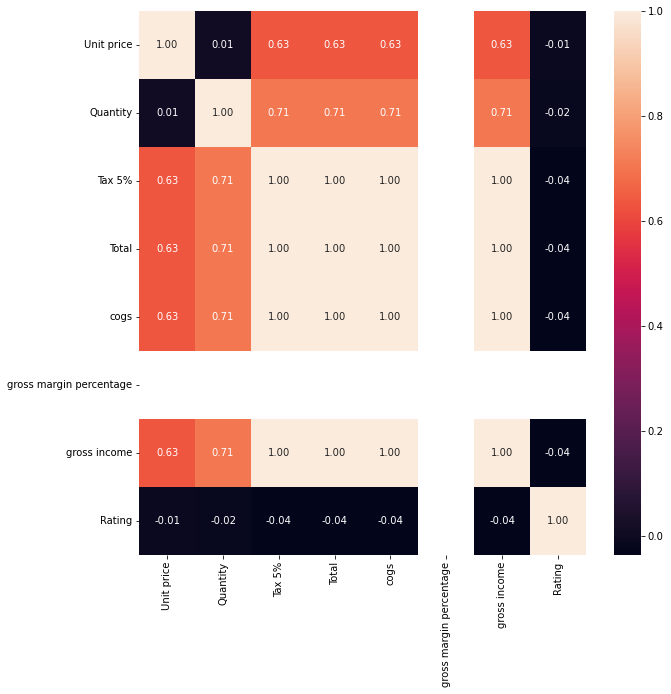

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.groupby('Branch').count()[['Invoice ID']]

,Invoice ID
Branch,
A,340
B,332
C,328


In [10]:
df.groupby(['Branch','Payment']).sum()[['gross income']]

gross income
Branch Payment                  
A      Cash            1608.6310
       Credit card     1575.9405
       Ewallet         1872.5890
B      Cash            1682.8315
       Credit card     1778.3265
       Ewallet         1595.8740
C      Cash            2051.7075
       Credit card     1444.1650
       Ewallet         1769.3040

In [1]:
dfn.groupby(['Payment']).sum()[['total']]

NameError: name 'dfn' is not defined

In [65]:
df.groupby('City').count()[['Invoice ID']]

,Invoice ID
City,
Mandalay,332
Naypyitaw,328
Yangon,340


In [66]:
df.groupby('City').sum()[['gross income']]

,gross income
City,
Mandalay,5057.0320
Naypyitaw,5265.1765
Yangon,5057.1605


In [68]:
df.groupby('City').sum()[['Quantity']]

,Quantity
City,
Mandalay,1820
Naypyitaw,1831
Yangon,1859


In [69]:
df.groupby('Product line').sum()[['Quantity']]

,Quantity
Product line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


In [57]:
df.groupby('Product line').count()[['Invoice ID']]

,Invoice ID
Product line,
Electronic accessories,170
Fashion accessories,178
Food and beverages,174
Health and beauty,152
Home and lifestyle,160
Sports and travel,166


In [64]:
df.groupby('Product line').sum()[['Total','cogs','gross income']]

,Total,cogs,gross income
Product line,,,
Electronic accessories,54337.5315,51750.03,2587.5015
Fashion accessories,54305.8950,51719.90,2585.9950
Food and beverages,56144.8440,53471.28,2673.5640
Health and beauty,49193.7390,46851.18,2342.5590
Home and lifestyle,53861.9130,51297.06,2564.8530
Sports and travel,55122.8265,52497.93,2624.8965


In [103]:
df_date=df.groupby(['Date']).sum()[['gross income']].reset_index()

In [104]:
df_date

,Date,gross income
0,1/1/2019,225.9610
1,1/10/2019,169.5690
2,1/11/2019,100.7125
3,1/12/2019,246.8935
4,1/13/2019,116.7240
...,...,...
84,3/5/2019,296.7085
85,3/6/2019,147.2665
86,3/7/2019,68.4885
87,3/8/2019,148.8280


In [109]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          89 non-null     datetime64[ns]
 1   gross income  89 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [105]:
df_date['Date']=df_date['Date'].astype('datetime64[ns]')

In [100]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

NameError: name 'x' is not defined

In [113]:
df['Date'].unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [106]:
df.plot.line(x=df_date['Date'],y=df_date['gross income'])

KeyError: "None of [DatetimeIndex(['2019-01-01', '2019-01-10', '2019-01-11', '2019-01-12',\n               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',\n               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-02',\n               '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23',\n               '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',\n               '2019-01-28', '2019-01-29', '2019-01-03', '2019-01-30',\n               '2019-01-31', '2019-01-04', '2019-01-05', '2019-01-06',\n               '2019-01-07', '2019-01-08', '2019-01-09', '2019-02-01',\n               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',\n               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',\n               '2019-02-18', '2019-02-19', '2019-02-02', '2019-02-20',\n               '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24',\n               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',\n               '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',\n               '2019-02-07', '2019-02-08', '2019-02-09', '2019-03-01',\n               '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13',\n               '2019-03-14', '2019-03-15', '2019-03-16', '2019-03-17',\n               '2019-03-18', '2019-03-19', '2019-03-02', '2019-03-20',\n               '2019-03-21', '2019-03-22', '2019-03-23', '2019-03-24',\n               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',\n               '2019-03-29', '2019-03-03', '2019-03-30', '2019-03-04',\n               '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',\n               '2019-03-09'],\n              dtype='datetime64[ns]', freq=None)] are in the [columns]"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df=df.rename(columns={'Invoice ID':'invoice_id','Branch':'branch', 'City':'city', 'Customer type':'cust_type', 'Gender':'gender',
       'Product line':'product_line', 'Unit price':'unit_price', 'Quantity':'quantity', 'Tax 5%':'tax', 'Total':'total', 'Date':'date',
       'Time':'time', 'Payment':'payment', 'gross margin percentage':'gross_margin_p', 'gross income':'gross_income',
       'Rating':'rating'})

In [8]:
df.head()

,invoice_id,branch,city,cust_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_p,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df['product_line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [10]:
df['cust_type'].unique()

array(['Member', 'Normal'], dtype=object)

Hypothesis:


- Mean of trx from Normal member is not significantly higher than mean of trx from exclusive member
- Mean of trx from Normal member is higher than mean of trx from exclusive member

In [11]:
df.groupby(['cust_type']).mean().reset_index()[['cust_type','unit_price']]

,cust_type,unit_price
0,Member,56.206986
1,Normal,55.135130


In [31]:
df.columns

Index(['invoice_id', 'branch', 'city', 'cust_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax', 'total', 'date', 'time', 'payment',
       'cogs', 'gross_margin_p', 'gross_income', 'rating'],
      dtype='object')

In [20]:
df.nunique()

invoice_id        1000
branch               3
city                 3
cust_type            2
gender               2
product_line         6
unit_price         943
quantity            10
tax                990
total              990
date                89
time               506
payment              3
cogs               990
gross_margin_p       1
gross_income       990
rating              61
dtype: int64

In [26]:
df['city'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [27]:
df['product_line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [29]:
df[['date']]

,date
0,1/5/2019
1,3/8/2019
2,3/3/2019
3,1/27/2019
4,2/8/2019
...,...
995,1/29/2019
996,3/2/2019
997,2/9/2019
998,2/22/2019


In [13]:
member = df[df['cust_type']=='Member'][['invoice_id','total']].groupby('invoice_id').sum().sample(90)
normal = df[df['cust_type']=='Normal'][['invoice_id','total']].groupby('invoice_id').sum().sample(90)

In [14]:
member.head()

,total
invoice_id,
291-32-1427,115.1850
527-09-6272,149.3625
652-49-6720,63.9975
710-46-4433,731.4300
836-82-5858,655.5465


In [15]:
normal.head()

,total
invoice_id,
592-34-6155,133.4340
727-17-0390,333.9525
689-16-9784,294.6510
827-77-7633,926.9505
575-67-1508,40.5300


In [16]:
print('Average unit price of member buyer purchases: ${}'.format(np.round(member.total.mean())))
print('Average unit price of normal buyer purchases: ${}'.format(np.round(normal.total.mean())))

Average unit price of member buyer purchases: $335.0
Average unit price of normal buyer purchases: $311.0


In [17]:
t_stat, p_val = stats.ttest_ind(member,normal)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.5145898397363751
t-statistics: 0.6530139351290957


In [18]:
df.head()

,invoice_id,branch,city,cust_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_p,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


- Kategori mana yang menghasilkan gross income paling tinggi?
- Kategori mana yang cogs nya paling tinggi
- Tingkat perubahan margin dan cogs per bulan

In [19]:
df.sort_values(by='date', ascending=False)

,invoice_id,branch,city,cust_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_p,gross_income,rating
729,299-29-0180,B,Mandalay,Member,Female,Home and lifestyle,52.18,7,18.263,383.523,3/9/2019,10:54,Cash,365.26,4.761905,18.263,9.3
755,652-43-6591,A,Yangon,Normal,Female,Fashion accessories,97.29,8,38.916,817.236,3/9/2019,13:18,Credit card,778.32,4.761905,38.916,6.2
124,268-27-6179,B,Mandalay,Member,Female,Fashion accessories,56.47,8,22.588,474.348,3/9/2019,14:57,Ewallet,451.76,4.761905,22.588,7.3
326,815-11-1168,A,Yangon,Member,Male,Food and beverages,99.78,5,24.945,523.845,3/9/2019,19:09,Cash,498.90,4.761905,24.945,5.4
122,219-22-9386,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.982,944.622,3/9/2019,17:26,Credit card,899.64,4.761905,44.982,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,1/1/2019,14:42,Credit card,742.20,4.761905,37.110,4.3
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0
